In [2]:
from scipy.fftpack import fft, ifft, rfft, irfft, fftfreq
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


0.04 0.02


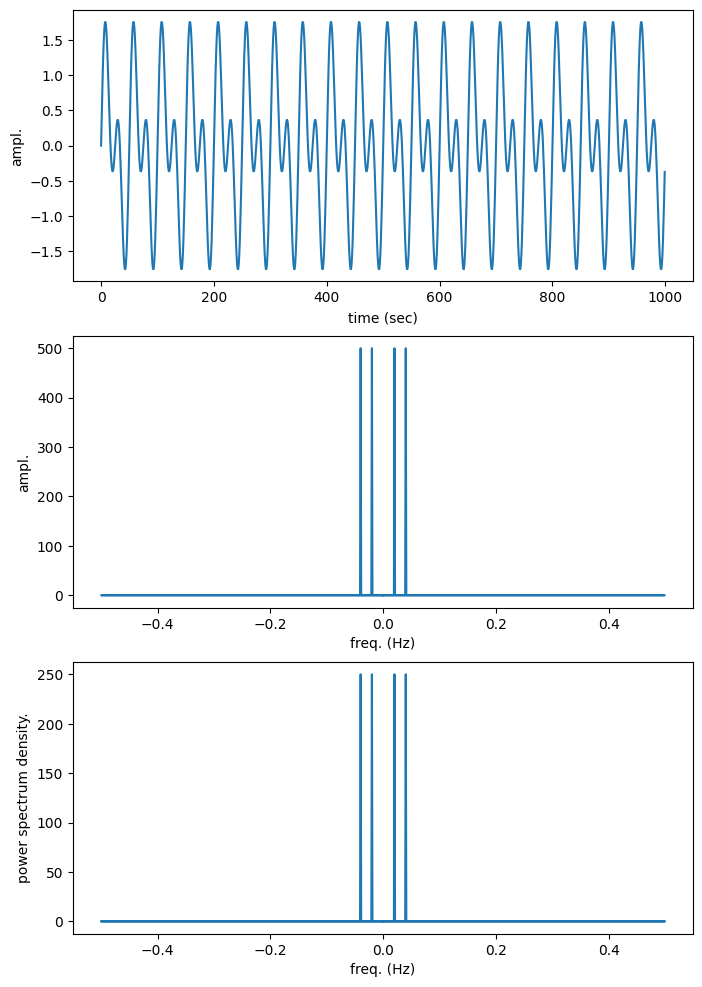

In [3]:
# generate input to filter, x
Nt, dt = 1000, 1. # descrete times

ampl1, T1 = 1.0, 25. # sinusoidal signal #1 compare periods (25,50), (26,51)
ampl2, T2 = 1.0, 50. # sinusoidal signal #2
f1, f2 = 1./T1, 1./T2
noise = 0.0 # random noise amplitude

fcut = (f1 + f2)/2.  # brick wall frequency cut

x,x1,x2,xn = np.zeros(Nt), np.zeros(Nt), np.zeros(Nt), np.zeros(Nt)
t = np.arange(0,Nt)

x1 = ampl1*np.sin(2.*np.pi*f1*t)
x2 = ampl2*np.sin(2.*np.pi*f2*t)
xn = noise*np.random.randn(Nt)
x = x1 + x2 + xn # generate signals, noise in time domain

fx = fft(x)                    # fx v faxis is signal in freq domain
faxis = fftfreq( x.size, dt)   # recall mirroring of fx and freq range 0 - f_nyquist
psd = fx*np.conj(fx) / Nt      # pdefinition of power density versus freq.

fig,axes = plt.subplots(3,1,figsize = (8,12))

axes[0].plot(t,x)
axes[0].set_xlabel("time (sec)")
axes[0].set_ylabel("ampl.")

axes[1].plot(faxis,np.abs(fx))
axes[1].set_xlabel("freq. (Hz)")
axes[1].set_ylabel("ampl.")

axes[2].plot(faxis,psd)
axes[2].set_xlabel("freq. (Hz)")
axes[2].set_ylabel("power spectrum density.")

print( f1, f2)

Text(0, 0.5, 'power spectrum density.')

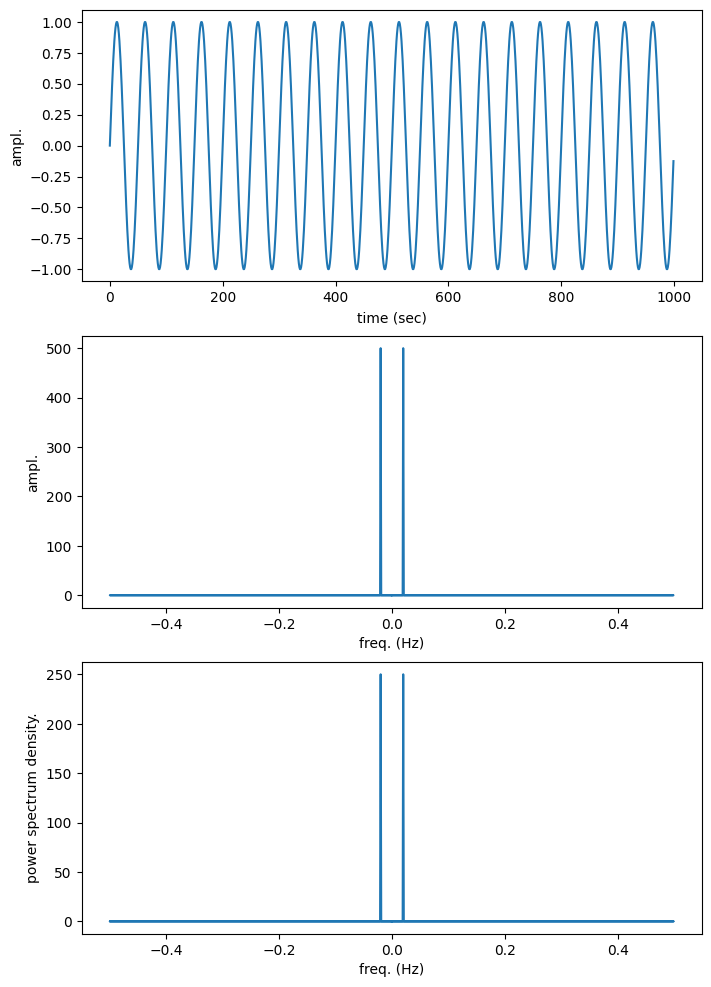

In [4]:
# compute output of filter, xp

cfx = np.copy(fx)         # avoids proble cfx = fx just pointing tos same aarray
cfx[abs(faxis) > +fcut] = 0    # apply filter in freq domain to remove higher freq.
# note faxis is array of frequencies, fcut is frequency cut, and (faxis < -fcut)
# is boolean `mask' that sets array elements = 0 if correspond mask element is true

cpsd = cfx*np.conj(cfx) / Nt   # power density of filtered signal
xp = ifft(cfx)                 # filter output is inverse DFT of filtered freq domain input

fig,axes = plt.subplots(3,1,figsize = (8,12))

axes[0].plot(t,xp)
axes[0].set_xlabel("time (sec)")
axes[0].set_ylabel("ampl.")

axes[1].plot(faxis,np.abs(cfx))
axes[1].set_xlabel("freq. (Hz)")
axes[1].set_ylabel("ampl.")

axes[2].plot(faxis,cpsd)
axes[2].set_xlabel("freq. (Hz)")
axes[2].set_ylabel("power spectrum density.")

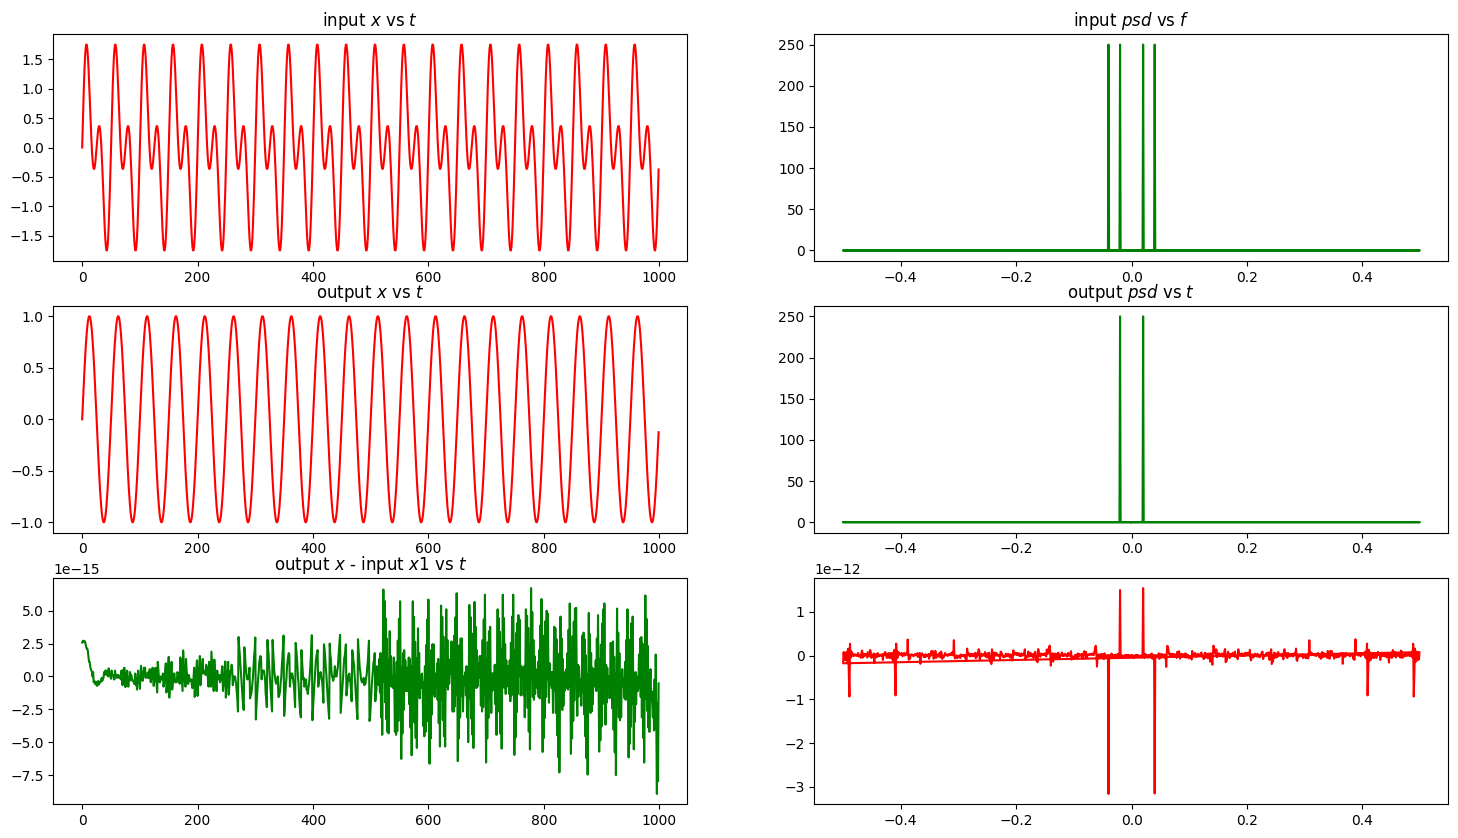

In [ ]:
# what did we do to x1?

fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows = 3,ncols= 2,figsize = (18,10))

ax1.set_title('input $x$ vs $t$')
ax2.set_title('input $psd$ vs $f$')
ax3.set_title('output $x$ vs $t$')
ax4.set_title('output $psd$ vs $t$')
ax5.set_title('output $x$ - input $x1$ vs $t$')

ax1.plot(t,x,'r')
ax2.plot(faxis,psd,'g')
ax3.plot(t,xp,'r')
ax4.plot(faxis,cpsd,'g')
ax5.plot(t,xp-x2,'g')
ax6.plot(faxis,fft(xp-x1),'r')
